## **Import Libraries**



In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:

X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

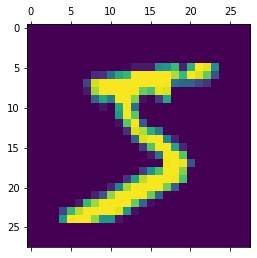

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

## **Scaling the Data**

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0] #Scaled data

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #Flattening 2D to 1D
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## **Neural network**

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4694 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2839 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9255


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.9239


[0.27032867074012756, 0.9239000082015991]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.04262733e-02, 1.70416399e-07, 6.12296760e-02, 9.44442034e-01,
       2.78380513e-03, 1.00919634e-01, 9.34777347e-07, 9.99696136e-01,
       8.39126706e-02, 5.39458752e-01], dtype=float32)

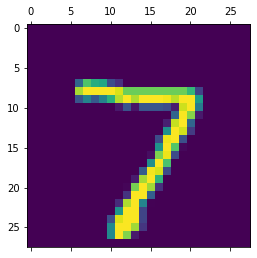

In [17]:
plt.matshow(X_test[0])

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels= y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1111,    2,    2,    0,    1,    4,    2,   13,    0],
       [   7,   12,  914,   17,    8,    5,   13,    9,   45,    2],
       [   2,    0,   18,  916,    0,   32,    2,   11,   22,    7],
       [   2,    1,    6,    1,  920,    0,    9,    4,   10,   29],
       [  10,    2,    2,   28,   11,  787,   14,    5,   28,    5],
       [  14,    3,    6,    1,    8,   13,  909,    2,    2,    0],
       [   2,    7,   22,    7,   10,    0,    0,  944,    3,   33],
       [   8,    7,    6,   19,    9,   34,    8,    8,  869,    6],
       [  11,    7,    1,   11,   34,   10,    0,   22,    8,  905]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

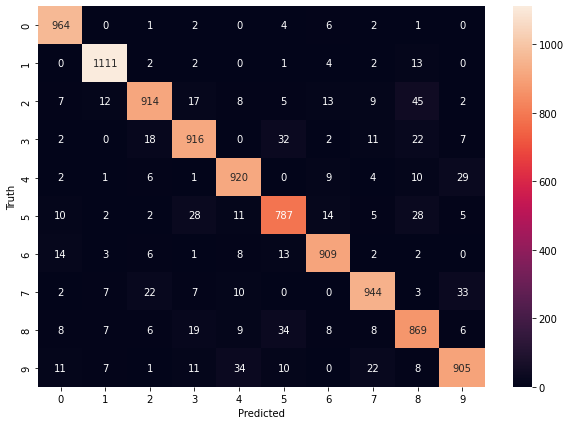

In [22]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Using hidden layer**

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9841


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9754


[0.08401362597942352, 0.9753999710083008]

Text(69.0, 0.5, 'Truth')

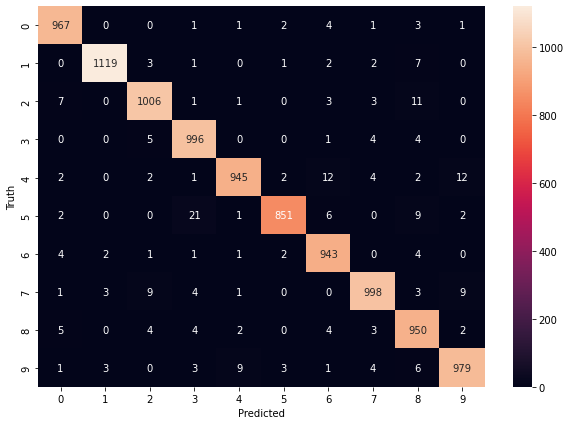

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Using Flatten layer so that we don't have to call .reshape on input dataset**

In [26]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation= 'sigmoid')
                          ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1221 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0845 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9793


[0.07770597189664841, 0.9793000221252441]

Text(69.0, 0.5, 'Truth')

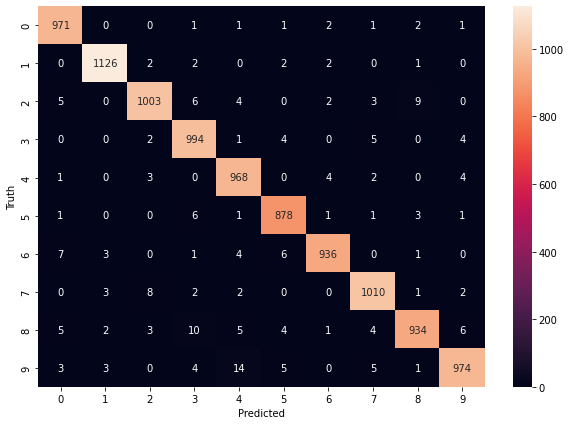

In [28]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
y_predicted1 = model.predict(X_test)
y_predicted1[0]

array([3.3132550e-01, 6.2575677e-06, 5.1997918e-01, 9.6575296e-01,
       5.0931330e-08, 1.7440319e-04, 4.7414019e-09, 9.9999821e-01,
       1.6951394e-01, 3.4600639e-01], dtype=float32)

In [32]:
np.argmax(y_predicted1[0])

7